In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,KFold
from keras import regularizers

In [3]:
# from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

In [6]:
df1 = pd.read_csv(r'.\csv\R6_yes.csv')
df2 = pd.read_csv(r'.\csv\R6_no.csv')
df3 = pd.read_csv(r'.\csv\R7_yes.csv')
df4 = pd.read_csv(r'.\csv\R7_no.csv')
df5 = pd.read_csv(r'.\csv\R8_yes.csv')
df6 = pd.read_csv(r'.\csv\R8_no.csv')
df7 = pd.read_csv(r'.\csv\R9_yes.csv')
df8 = pd.read_csv(r'.\csv\R9_no.csv')
df9 = pd.read_csv(r'.\csv\R10_yes.csv')
df10 = pd.read_csv(r'.\csv\R10_no.csv')

In [7]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)
df.shape

(1662, 14)

In [8]:
#reindex of all data after concat
df.reset_index(drop=True, inplace=True)

In [10]:
def Normalization2(x):
    return [(float(i)-np.mean(x))/(max(x)-min(x)) for i in x]

df['weight_nor'] = Normalization2(df['weight'])
df['height_nor'] = Normalization2(df['height'])

In [11]:
df.head()

,spid,imgspid,dementia,gender,race,intvrage,weight,howtallft,howtallin,wrdimmrc,wrddlyrc,clkdraw,clkimgcl,height,weight_nor,height_nor
0,10000647,100006476,1,2,1,5,153,5,1,5,3,3,1,154.94,-0.051862,-0.172619
1,10000651,100006516,1,1,1,6,200,5,5,3,0,4,1,165.10,0.076554,-0.029762
2,10001416,100014166,1,2,3,5,132,5,0,4,1,1,1,152.40,-0.109239,-0.208333
3,10001778,100017786,1,2,2,6,184,5,3,5,1,3,3,160.02,0.032838,-0.101190
4,10001823,100018236,1,2,3,4,144,5,4,2,0,2,1,162.56,-0.076452,-0.065476


In [12]:
X = df[['gender','race','intvrage','wrdimmrc','wrddlyrc','clkdraw','clkimgcl','weight_nor','height_nor']]
X.shape

(1662, 9)

In [13]:
X.head()

,gender,race,intvrage,wrdimmrc,wrddlyrc,clkdraw,clkimgcl,weight_nor,height_nor
0,2,1,5,5,3,3,1,-0.051862,-0.172619
1,1,1,6,3,0,4,1,0.076554,-0.029762
2,2,3,5,4,1,1,1,-0.109239,-0.208333
3,2,2,6,5,1,3,3,0.032838,-0.101190
4,2,3,4,2,0,2,1,-0.076452,-0.065476


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()  
AD_values = encoder.fit_transform(df['dementia'].values)  
AD_values = np.array([AD_values]).T

# for softmax
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_total=enc.fit_transform(AD_values)
y_total=y_total.toarray()
y_total

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [15]:
y = df['dementia']

In [17]:
from numpy.random import seed
seed(2)
tf.random.set_seed(7)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12,stratify=y)

#network size
model = Sequential()
model.add(Dense(128,input_dim=9,use_bias=False,activation='relu'))
model.add(Dense(2,activation='softmax', use_bias=False, name='Dense_1'))
model.add(Dense(2,activation='softmax', use_bias=False, name='Dense_2'))

# loss is cross entropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])


### 切分测试集与验证集
X_train, X_test, y_train, y_test = train_test_split(X, y_total, test_size=0.25, random_state=0, stratify=y_total)
model.fit(X_train, y_train, epochs=20, batch_size=32,class_weight={0:1,1:5})

(1246, 9)
(416, 9)
(1246, 2)
(416, 2)
Epoch 1/20
39/39 [==============================] - 1s 2ms/step - loss: 1.1589 - auc: 0.1919
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1552 - auc: 0.2369
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1502 - auc: 0.2496
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1415 - auc: 0.4105

In [13]:
from numpy.random import seed
seed(2)
tf.random.set_seed(7)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12,stratify=y)

#network size
model = Sequential()
model.add(Dense(128,input_dim=9,use_bias=False,activation='relu'))
model.add(Dense(2,activation='softmax', use_bias=False, name='Dense_1'))
model.add(Dense(2,activation='softmax', use_bias=False, name='Dense_2'))

# loss is cross entropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])


### 切分测试集与验证集
X_train, X_test, y_train, y_test = train_test_split(X, y_total, test_size=0.2, random_state=0, stratify=y_total)

model.fit(X_train, y_train, epochs=25, batch_size=32,class_weight={0:1,1:5}, validation_split=0.2)

Epoch 1/25
34/34 [==============================] - 1s 12ms/step - loss: 1.1572 - auc: 0.1641 - val_loss: 0.7269 - val_auc: 0.2174
Epoch 2/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1527 - auc: 0.2294 - val_loss: 0.7229 - val_auc: 0.2438
Epoch 3/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1489 - auc: 0.2419 - val_loss: 0.7171 - val_auc: 0.2513
Epoch 4/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1422 - auc: 0.2992 - val_loss: 0.7090 - val_auc: 0.4518
Epoch 5/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1332 - auc: 0.4569 - val_loss: 0.6966 - val_auc: 0.6594
Epoch 6/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1229 - auc: 0.5936 - val_loss: 0.7038 - val_auc: 0.4991
Epoch 7/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1133 - auc: 0.6383 - val_loss: 0.6932 - val_auc: 0.5913
Epoch 8/25
34/34 [==============================] - 0s 2ms/step - loss: 1.1019 - auc: 0.6

In [14]:
prediction = model.predict(X_test)
prediction1 = (prediction > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       277
           1       0.36      0.75      0.49        56

   micro avg       0.74      0.74      0.74       333
   macro avg       0.65      0.74      0.66       333
weighted avg       0.84      0.74      0.77       333
 samples avg       0.74      0.74      0.74       333



C:\Users\bowei\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


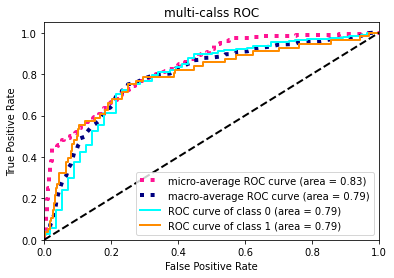

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp

y_label = np.array(y_test)
y_score = np.array(prediction)
n_classes = 2
 
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
# micro（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
# macro（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
 
# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
 
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-calss ROC')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test[:,1], prediction1[:,1]))

#TN|FP
#FN|TP

[[203  74]
 [ 14  42]]


In [35]:
df.to_csv(r'C:\Users\bowei\projectes\clockdrawing\csv\all.csv',index=False,header=True)

### Logistic Regeression Binary Classification 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [37]:
estimator = LogisticRegression(C=1.0)
selector = RFE(estimator=estimator, n_features_to_select=4,step=1)
X_t = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y,test_size=0.2, random_state=0,stratify=y)

ori = LogisticRegression(C=1.0)
ori_rfe = LogisticRegression(C=1.0)
ori.fit(X_train, y_train)
ori_rfe.fit(X_train_t, y_train_t)

LogisticRegression()

In [38]:
print("Original DataSet: test score=%s" % (ori.score(X_test, y_test)))
print("Selected DataSet: test score=%s" % (ori_rfe.score(X_test_t, y_test_t)))

Original DataSet: test score=0.8468468468468469
Selected DataSet: test score=0.8408408408408409


In [40]:
y_predict = ori.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       278
           1       0.59      0.24      0.34        55

    accuracy                           0.85       333
   macro avg       0.73      0.60      0.63       333
weighted avg       0.82      0.85      0.82       333



In [42]:
y_predict1 = ori_rfe.predict(X_test_t)
print(classification_report(y_test_t, y_predict1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       278
           1       0.75      0.05      0.10        55

    accuracy                           0.84       333
   macro avg       0.80      0.53      0.51       333
weighted avg       0.83      0.84      0.78       333



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

#TN|FP
#FN|TP

[[269   9]
 [ 42  13]]


In [46]:
print(confusion_matrix(y_test_t, y_predict1))

[[277   1]
 [ 52   3]]


In [72]:
estimator = LogisticRegression(C=1.0)
selector = RFE(estimator=estimator, n_features_to_select=7)
X_t = selector.fit_transform(X, y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y,test_size=0.2, random_state=0,stratify=y)

#ori = LogisticRegression(C=1.0)
ori_rfe = LogisticRegression(C=1.0)
#ori.fit(X_train, y_train)
ori_rfe.fit(X_train_t, y_train_t)

print("Selected DataSet: test score=%s" % (ori_rfe.score(X_test_t, y_test_t)))

Selected DataSet: test score=0.8498498498498499


In [73]:
y_predict1 = ori_rfe.predict(X_test_t)
print(classification_report(y_test_t, y_predict1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       278
           1       0.61      0.25      0.36        55

    accuracy                           0.85       333
   macro avg       0.74      0.61      0.64       333
weighted avg       0.82      0.85      0.82       333



In [74]:
print(confusion_matrix(y_test_t, y_predict1))

[[269   9]
 [ 41  14]]


In [75]:
print("N_features %s" % selector.n_features_) # 保留的特征数
print("Support is %s" % selector.support_) # 是否保留
print("Ranking %s" % selector.ranking_) # 重要程度排名

N_features 7
Support is [False False  True  True  True  True  True  True  True]
Ranking [3 2 1 1 1 1 1 1 1]


In [76]:
X.head()

,gender,race,intvrage,wrdimmrc,wrddlyrc,clkdraw,clkimgcl,weight_nor,height_nor
0,2,1,5,5,3,3,1,-0.051862,-0.172619
1,1,1,6,3,0,4,1,0.076554,-0.029762
2,2,3,5,4,1,1,1,-0.109239,-0.208333
3,2,2,6,5,1,3,3,0.032838,-0.101190
4,2,3,4,2,0,2,1,-0.076452,-0.065476
